<a href="https://colab.research.google.com/github/OctavaOrigin/Deep-Learning/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%D0%A1%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sales_of_company_x = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("daily-total-female-births-in-cal.csv")

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

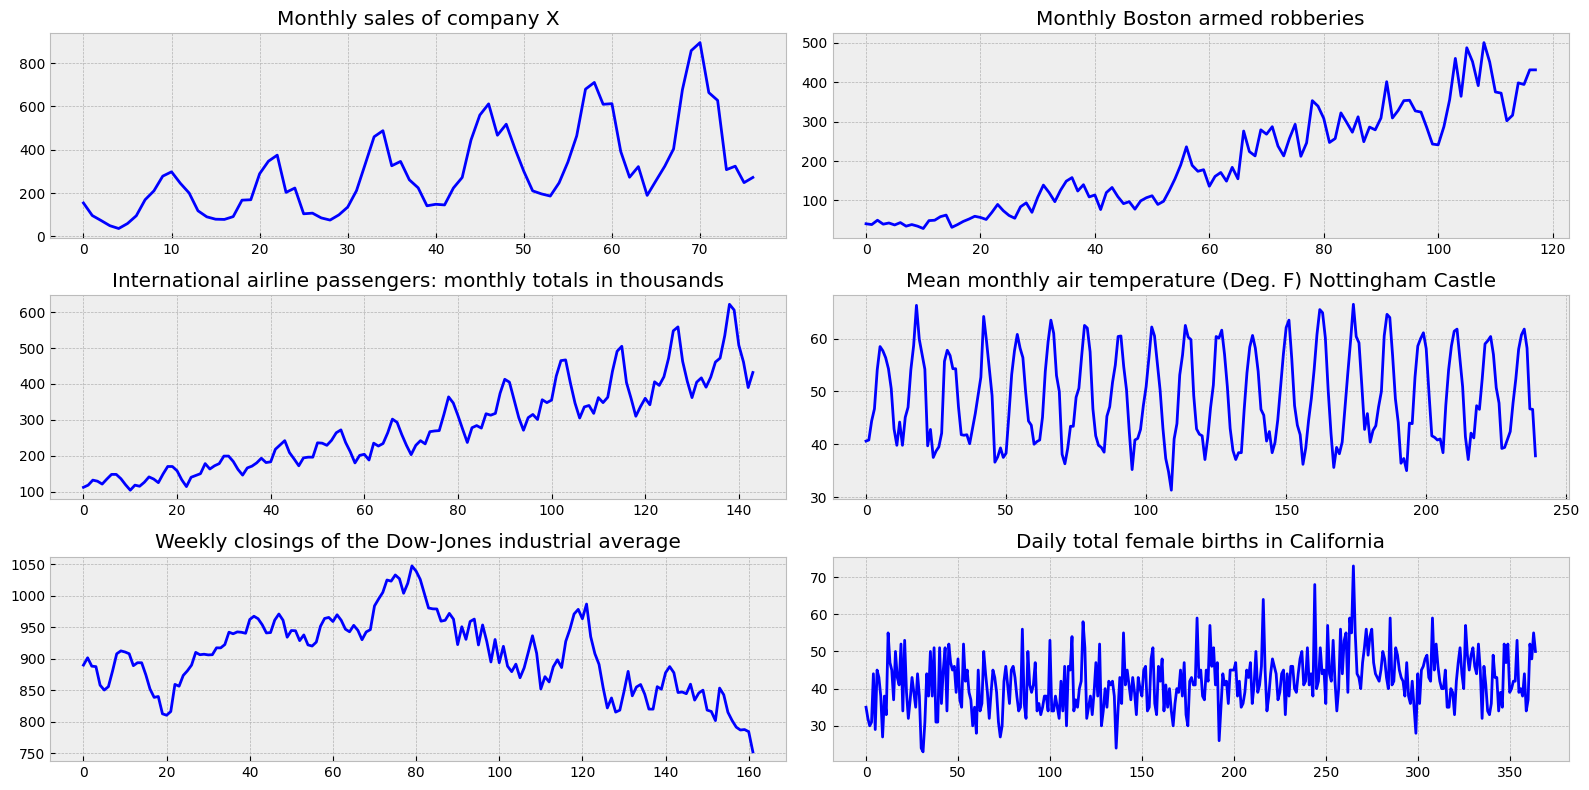

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

###Тест Дики-Фуллера

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def adf(series):
  result = adfuller(series)
  return result[1]

In [8]:
for key in all_series:
  print(f'p-value for {key}: {adf(all_series[key])}')

p-value for Monthly sales of company X: 0.9888894205170052
p-value for Monthly Boston armed robberies: 0.994277563805723
p-value for International airline passengers: monthly totals in thousands: 0.991880243437641
p-value for Mean monthly air temperature (Deg. F) Nottingham Castle: 0.016989030222608604
p-value for Weekly closings of the Dow-Jones industrial average: 0.6224548515589733
p-value for Daily total female births in California: 5.2434129901498554e-05


###Нормализируем

In [9]:
from scipy.stats import boxcox

In [10]:
for key in all_series:
  transformed_data, lambda_value = boxcox(all_series[key])
  all_series[key] = pd.Series(transformed_data)

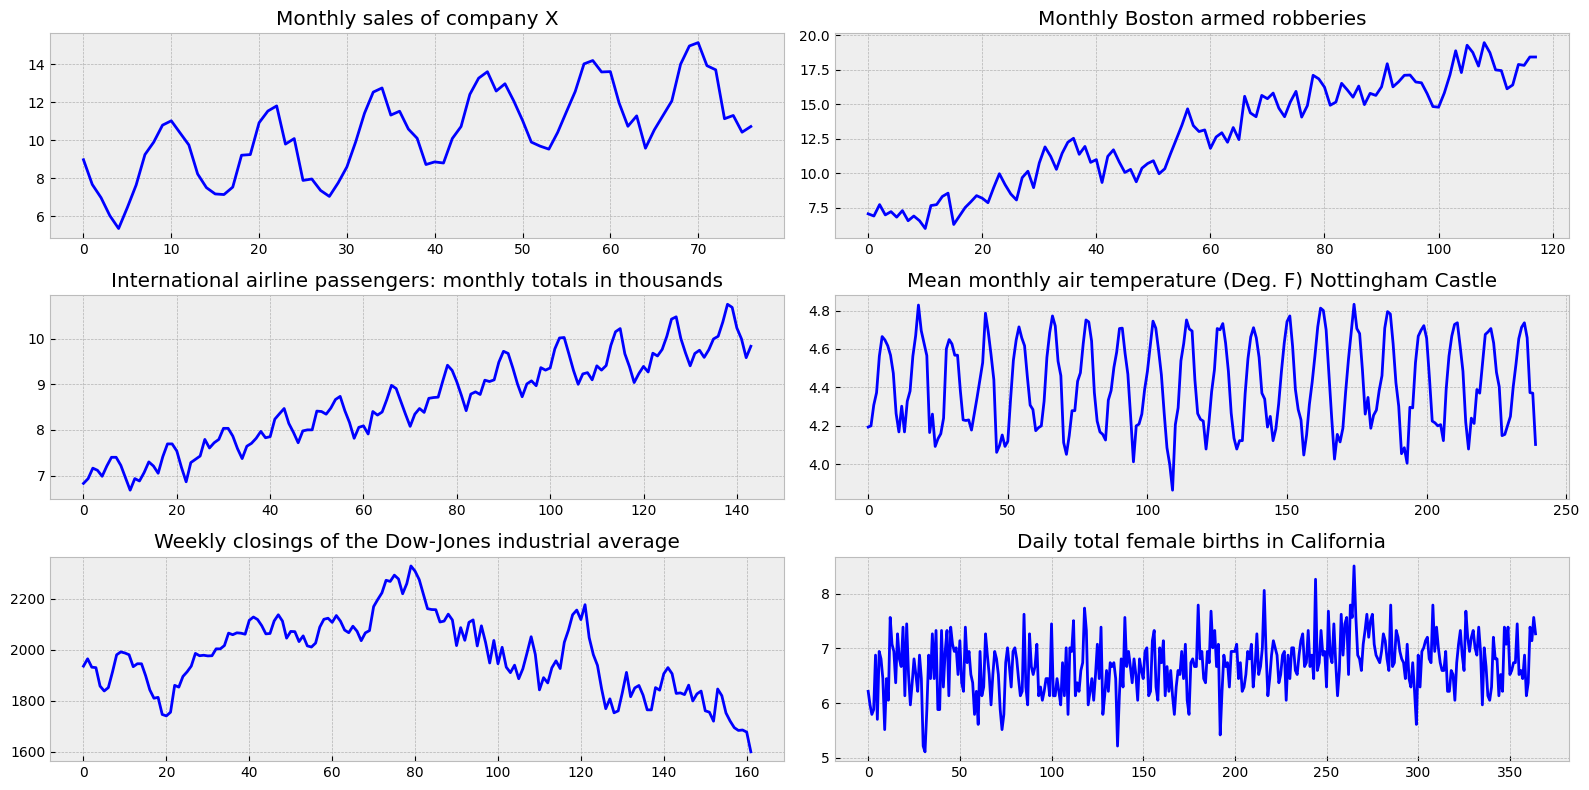

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

###Дифференцируем

In [12]:
for key in all_series:
  all_series[key] = pd.Series(np.diff(all_series[key].values))

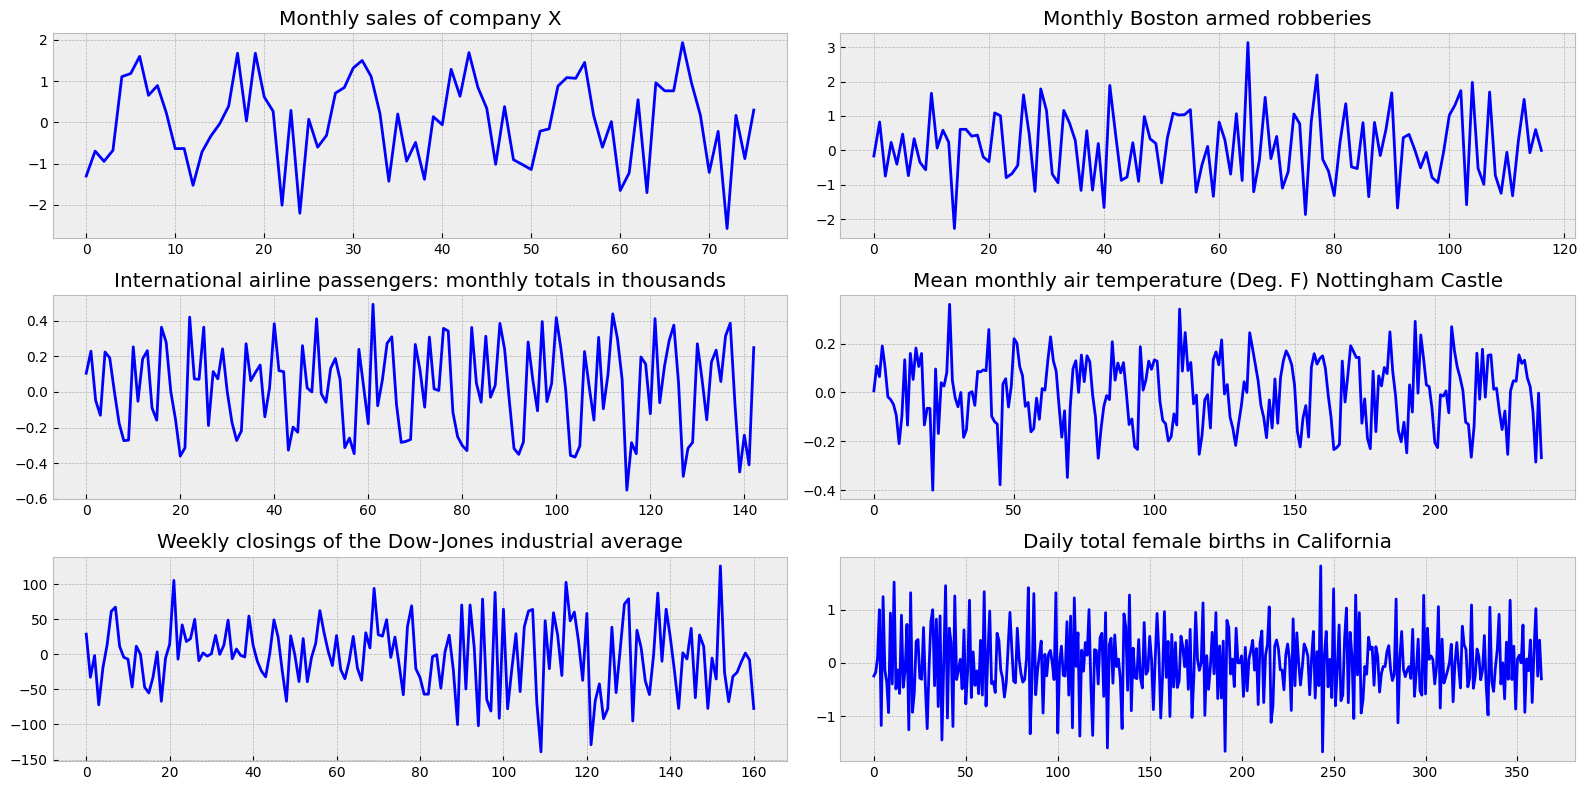

In [13]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)

        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

###Снова Тест Дики-Фуллера

In [14]:
for key in all_series:
  print(f'p-value for {key}: {adf(all_series[key])}')

p-value for Monthly sales of company X: 0.015599469714685638
p-value for Monthly Boston armed robberies: 3.3922060399231255e-07
p-value for International airline passengers: monthly totals in thousands: 0.04873833392661749
p-value for Mean monthly air temperature (Deg. F) Nottingham Castle: 1.559473460323486e-22
p-value for Weekly closings of the Dow-Jones industrial average: 2.3826910704129454e-24
p-value for Daily total female births in California: 5.159403663120572e-24


Отклоняем нулевую гипотезу для каждого ряда